this script plots the paper reduction of countries after a specific country is removed

In [2]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gp
import os
import funding.core

In [5]:
cntry_full_path="/u/miaoli/ember_home/dropbox/NationalFunding/Data/simulated_data/Data/DerivedData/Derived/cntry_author_full.csv"
cntry_filter_path='/u/miaoli/ember_home/dropbox/NationalFunding/Data/simulated_data/Data/DerivedData/Derived/dependence/pub_noforeign_fund_top20.csv'
geo_path="./u/miaoli/ember_home/dropbox/NationalFunding/Data/simulated_data/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp"

plot_path="../../data/nf_folder/Figs/dep-FundExchange/influence_area/United Kingdom.pdf"

In [6]:
raw_df=pd.read_csv(cntry_full_path)
raw_df=raw_df.rename(columns={'aucntry':'cntry'})
raw_df.head()

,cntry,year,dis,count
0,Afghanistan,2009,9,1
1,Afghanistan,2009,23,1
2,Afghanistan,2010,69,1
3,Afghanistan,2010,78,1
4,Afghanistan,2010,82,1


In [7]:
filter_df=pd.read_csv(cntry_filter_path)
filter_df.head()

,author_distinct,dis,count,srce_cntry,year
0,Afghanistan,82,1,China,2014
1,Albania,31,1,China,2014
2,Albania,51,1,China,2014
3,Albania,75,1,China,2014
4,Albania,83,1,China,2014


In [8]:
filter_df.srce_cntry.unique()

array(['China', 'United States', 'Germany', 'Spain', 'Japan',
       'United Kingdom', 'Brazil', 'Canada', 'South Korea', 'EU',
       'France', 'Australia', 'India', 'Russia', 'Taiwan', 'Sweden',
       'Italy', 'Switzerland', 'Netherlands', 'Portugal'], dtype=object)

In [30]:
def read_group(path,groupby,reset_col):
    df=pd.read_csv(path)
    df=df.rename(columns={'author_distinct':'cntry'})
    df=df.groupby(groupby)['count'].sum().reset_index(name=reset_col)
    return df

In [31]:
raw_df=read_group(cntry_full_path,['cntry'],'raw')
filter_df=read_group(cntry_filter_path,['cntry','srce_cntry'],'filter')

In [32]:
meta=raw_df.merge(filter_df,on='cntry')
meta['p']=(meta['raw']-meta['filter'])/meta['raw']
meta['p']=meta['p'].apply(lambda x:np.around(x,2))

In [34]:
filename

'United Kingdom.pdf'

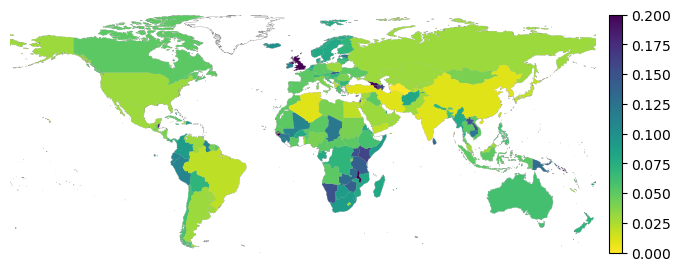

In [33]:
world_geo=funding.core.read_geofile(geo_path)

fig, ax = plt.subplots(figsize=(8,6))
dirname, filename = os.path.split(plot_path)
cntry = filename.split('.')[0]
df=meta[meta.srce_cntry==cntry]

plot_data=world_geo.merge(df,left_on='WoS',right_on='cntry')
plot_data=gp.GeoDataFrame(plot_data)
fig,ax=funding.core.plot_worldmap(ax, fig, world_geo, plot_data, 'p','viridis_r',0.0,0.2)
ax.margins(0)
#plt.savefig(plot_path,bbox_inches='tight')
#plt.close()